In [423]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing, neighbors
from sklearn.model_selection import cross_validate

In [398]:
df = pd.read_csv('medical_clean.csv')

In [399]:
df.head()

CaseOrder Customer_id                           Interaction  \
0          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   

                                UID          City State        County    Zip  \
0  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan  35621   
1  176354c5eef714957d486009feabf195      Marianna    FL       Jackson  32446   
2  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha  57110   
3  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca  56072   
4  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William  23181   

        Lat       Lng  ...  TotalCharge Additional_charges Item1 Item2  Item3  \
0  34.34960 -86.72508  ...  3726.702860       17939.403420     3     3      2   
1  30.84513 -85.22907  ...  4193.190458       17612.998120     3     4      3   
2  43.54321 -96.63772  ...  2434.234222       17505.192460     2     4      4   
3  43.89744 -93.51479  ...  2127.830423       12993.437350     3     5      5   
4  37.59894 -76.88958  ...  2113.073274        3716.525786     2     1      3   

   Item4  Item5 Item6 Item7 Item8  
0      2      4     3     3     4  
1      4      4     4     3     3  
2      4      3     4     3     3  
3      3      4     5     5     5  
4      3      5     3     4     3  

[5 rows x 50 columns]

In [400]:
df.shape

(10000, 50)

In [401]:
df.index

RangeIndex(start=0, stop=10000, step=1)

g = sns.pairplot(df, hue = 'ReAdmis')

In [402]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [403]:
df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City','County', 'Zip', 'Lat', 'Lng','County', 'Zip', 'Lat', 'Lng'], axis = 1)

State  Population      Area          TimeZone  \
0       AL        2951  Suburban   America/Chicago   
1       FL       11303     Urban   America/Chicago   
2       SD       17125  Suburban   America/Chicago   
3       MN        2162  Suburban   America/Chicago   
4       VA        5287     Rural  America/New_York   
...    ...         ...       ...               ...   
9995    NC        4762     Urban  America/New_York   
9996    NJ        1251     Urban  America/New_York   
9997    TN         532     Rural   America/Chicago   
9998    SD         271     Rural    America/Denver   
9999    PA       41524     Urban  America/New_York   

                                       Job  Children  Age    Income  \
0         Psychologist, sport and exercise         1   53  86575.93   
1             Community development worker         3   51  46805.99   
2                  Chief Executive Officer         3   53  14370.14   
3                      Early years teacher         0   78  39741.49   
4              Health promotion specialist         1   22   1209.56   
...                                    ...       ...  ...       ...   
9995                Programmer, multimedia         2   25  45967.61   
9996         Restaurant manager, fast food         4   87  14983.02   
9997            Psychologist, occupational         3   45  65917.81   
9998  Outdoor activities/education manager         3   43  29702.32   
9999            Sports development officer         8   70  62682.63   

        Marital  Gender  ...  TotalCharge  Additional_charges  Item1  Item2  \
0      Divorced    Male  ...  3726.702860        17939.403420      3      3   
1       Married  Female  ...  4193.190458        17612.998120      3      4   
2       Widowed  Female  ...  2434.234222        17505.192460      2      4   
3       Married    Male  ...  2127.830423        12993.437350      3      5   
4       Widowed  Female  ...  2113.073274         3716.525786      2      1   
...         ...     ...  ...          ...                 ...    ...    ...   
9995    Widowed    Male  ...  6850.942000         8927.642000      3      2   
9996    Widowed    Male  ...  7741.690000        28507.150000      3      3   
9997  Separated  Female  ...  8276.481000        15281.210000      3      3   
9998   Divorced    Male  ...  7644.483000         7781.678000      5      5   
9999  Separated  Female  ...  7887.553000        11643.190000      4      3   

      Item3 Item4 Item5 Item6 Item7 Item8  
0         2     2     4     3     3     4  
1         3     4     4     4     3     3  
2         4     4     3     4     3     3  
3         5     3     4     5     5     5  
4         3     3     5     3     4     3  
...     ...   ...   ...   ...   ...   ...  
9995      2     3     4     3     4     2  
9996      4     2     5     3     4     4  
9997      3     4     4     2     3     2  
9998      3     4     4     3     4     3  
9999      3     2     3     6     4     3  

[10000 rows x 41 columns]

In [404]:
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 36:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature CaseOrder :10000
The number of values for feature Customer_id :10000
The number of values for feature Interaction :10000
The number of values for feature UID :10000
The number of values for feature City :6072
The number of values for feature State :52
The number of values for feature County :1607
The number of values for feature Zip :8612
The number of values for feature Lat :8588
The number of values for feature Lng :8725
The number of values for feature Population :5951
The number of values for feature Area :3 -- ['Rural' 'Suburban' 'Urban']
The number of values for feature TimeZone :26 -- ['America/Adak' 'America/Anchorage' 'America/Boise' 'America/Chicago'
 'America/Denver' 'America/Detroit' 'America/Indiana/Indianapolis'
 'America/Indiana/Knox' 'America/Indiana/Marengo'
 'America/Indiana/Tell_City' 'America/Indiana/Vevay'
 'America/Indiana/Vincennes' 'America/Indiana/Winamac'
 'America/Kentucky/Louisville' 'America/Los_Angeles' 'America/Menominee'


In [405]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [406]:
df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City','County', 'Zip', 
         'Lat', 'Lng','County', 'Zip', 'Lat', 'Lng','Population','Job', 'Income','Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8','TimeZone'], axis = 1)

In [407]:
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 36:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature State :52
The number of values for feature Area :3 -- ['Rural' 'Suburban' 'Urban']
The number of values for feature Children :11 -- [ 0  1  2  3  4  5  6  7  8  9 10]
The number of values for feature Age :72
The number of values for feature Marital :5 -- ['Divorced' 'Married' 'Never Married' 'Separated' 'Widowed']
The number of values for feature Gender :3 -- ['Female' 'Male' 'Nonbinary']
The number of values for feature ReAdmis :2 -- ['No' 'Yes']
The number of values for feature VitD_levels :9976
The number of values for feature Doc_visits :9 -- [1 2 3 4 5 6 7 8 9]
The number of values for feature Full_meals_eaten :8 -- [0 1 2 3 4 5 6 7]
The number of values for feature vitD_supp :6 -- [0 1 2 3 4 5]
The number of values for feature Soft_drink :2 -- ['No' 'Yes']
The number of values for feature Initial_admin :3 -- ['Elective Admission' 'Emergency Admission' 'Observation Admission']
The number of values for feature HighBlood :2 -- ['No' 'Yes']
The number

In [408]:
df.isnull().sum()

State                 0
Area                  0
Children              0
Age                   0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64

number_data = df[['Children','Age','VitD_levels','Doc_visits','Full_meals_eaten','vitD_supp','Initial_days', 'TotalCharge','Additional_charges']]

g = sns.pairplot(number_data, hue = 'Exited', diag_kws={'bw': 0.2})

In [409]:
nvals = df[['Children','Age','VitD_levels','Doc_visits','Full_meals_eaten','vitD_supp','Initial_days', 'TotalCharge','Additional_charges','ReAdmis']]

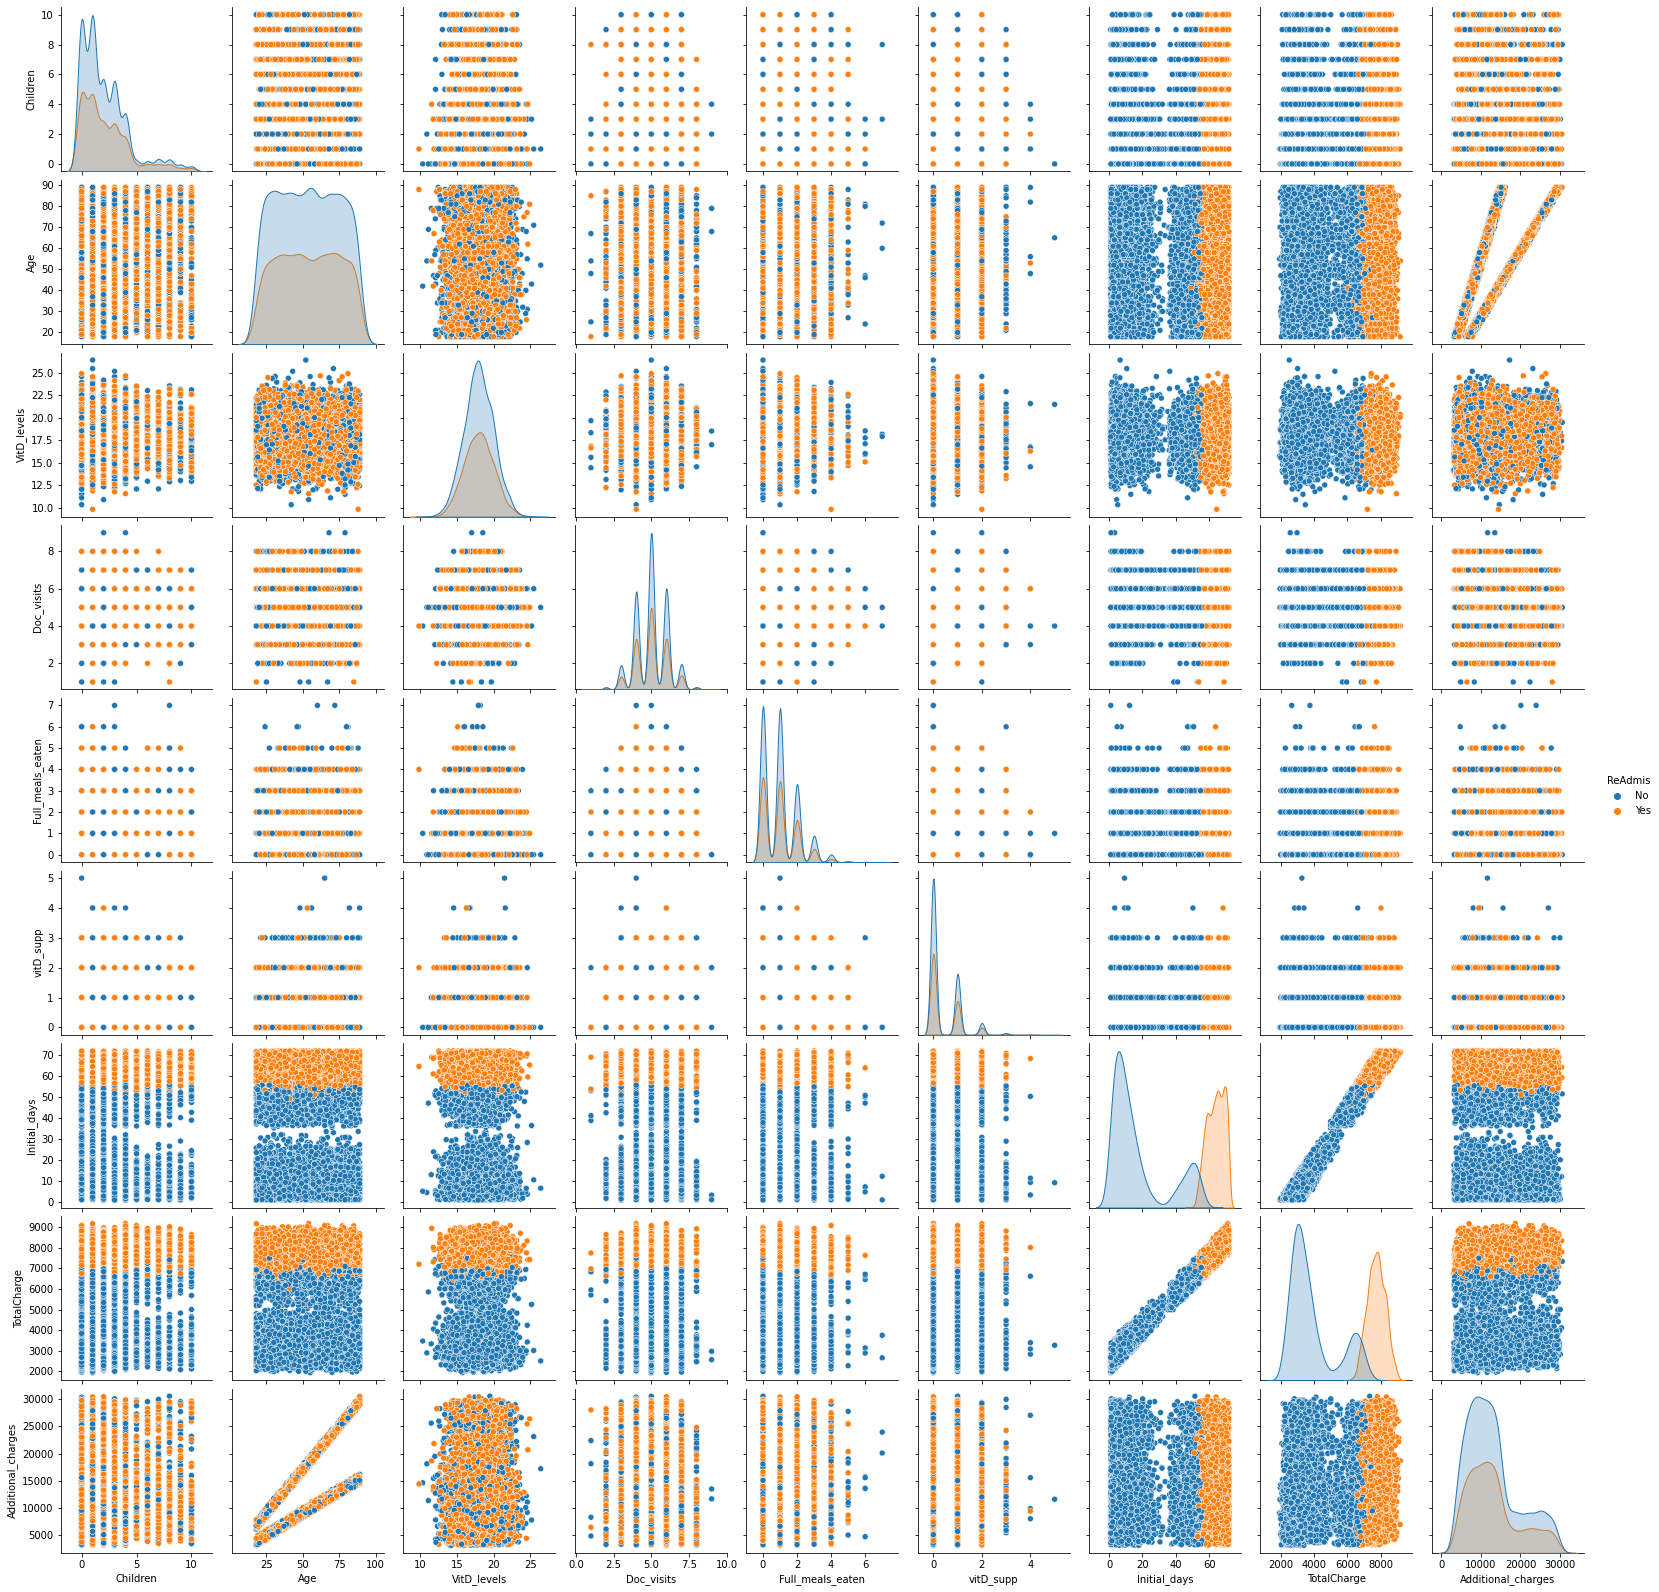

In [410]:
g = sns.pairplot(vals, hue = 'ReAdmis')

In [411]:
df.columns

Index(['State', 'Area', 'Children', 'Age', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges'],
      dtype='object')

In [412]:
#df = pd.concat([df, Yvals], axis = 1)
df.columns

Index(['State', 'Area', 'Children', 'Age', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges'],
      dtype='object')

In [413]:
df = pd.get_dummies(df, columns=['ReAdmis'], prefix='Readmitted',drop_first=True)

In [414]:
df

State      Area  Children  Age    Marital  Gender  VitD_levels  \
0       AL  Suburban         1   53   Divorced    Male    19.141466   
1       FL     Urban         3   51    Married  Female    18.940352   
2       SD  Suburban         3   53    Widowed  Female    18.057507   
3       MN  Suburban         0   78    Married    Male    16.576858   
4       VA     Rural         1   22    Widowed  Female    17.439069   
...    ...       ...       ...  ...        ...     ...          ...   
9995    NC     Urban         2   25    Widowed    Male    16.980860   
9996    NJ     Urban         4   87    Widowed    Male    18.177020   
9997    TN     Rural         3   45  Separated  Female    17.129070   
9998    SD     Rural         3   43   Divorced    Male    19.910430   
9999    PA     Urban         8   70  Separated  Female    18.388620   

      Doc_visits  Full_meals_eaten  vitD_supp  ... BackPain Anxiety  \
0              6                 0          0  ...      Yes     Yes   
1              4                 2          1  ...       No      No   
2              4                 1          0  ...       No      No   
3              4                 1          0  ...       No      No   
4              5                 0          2  ...       No      No   
...          ...               ...        ...  ...      ...     ...   
9995           4                 2          1  ...       No     Yes   
9996           5                 0          0  ...       No      No   
9997           4                 2          0  ...       No     Yes   
9998           5                 2          1  ...      Yes      No   
9999           5                 0          1  ...       No      No   

     Allergic_rhinitis Reflux_esophagitis Asthma     Services Initial_days  \
0                  Yes                 No    Yes   Blood Work    10.585770   
1                   No                Yes     No  Intravenous    15.129562   
2                   No                 No     No   Blood Work     4.772177   
3                   No                Yes    Yes   Blood Work     1.714879   
4                  Yes                 No     No      CT Scan     1.254807   
...                ...                ...    ...          ...          ...   
9995                No                Yes     No  Intravenous    51.561220   
9996                No                 No    Yes      CT Scan    68.668240   
9997               Yes                 No     No  Intravenous    70.154180   
9998                No                 No     No   Blood Work    63.356900   
9999               Yes                 No     No   Blood Work    70.850590   

      TotalCharge Additional_charges Readmitted_Yes  
0     3726.702860       17939.403420              0  
1     4193.190458       17612.998120              0  
2     2434.234222       17505.192460              0  
3     2127.830423       12993.437350              0  
4     2113.073274        3716.525786              0  
...           ...                ...            ...  
9995  6850.942000        8927.642000              0  
9996  7741.690000       28507.150000              1  
9997  8276.481000       15281.210000              1  
9998  7644.483000        7781.678000              1  
9999  7887.553000       11643.190000              1  

[10000 rows x 29 columns]

In [415]:
vals = df[['Children','Age','VitD_levels','Doc_visits','Full_meals_eaten','vitD_supp','Initial_days', 'TotalCharge','Additional_charges','Readmitted_Yes']]

In [416]:
avals = abs(vals)

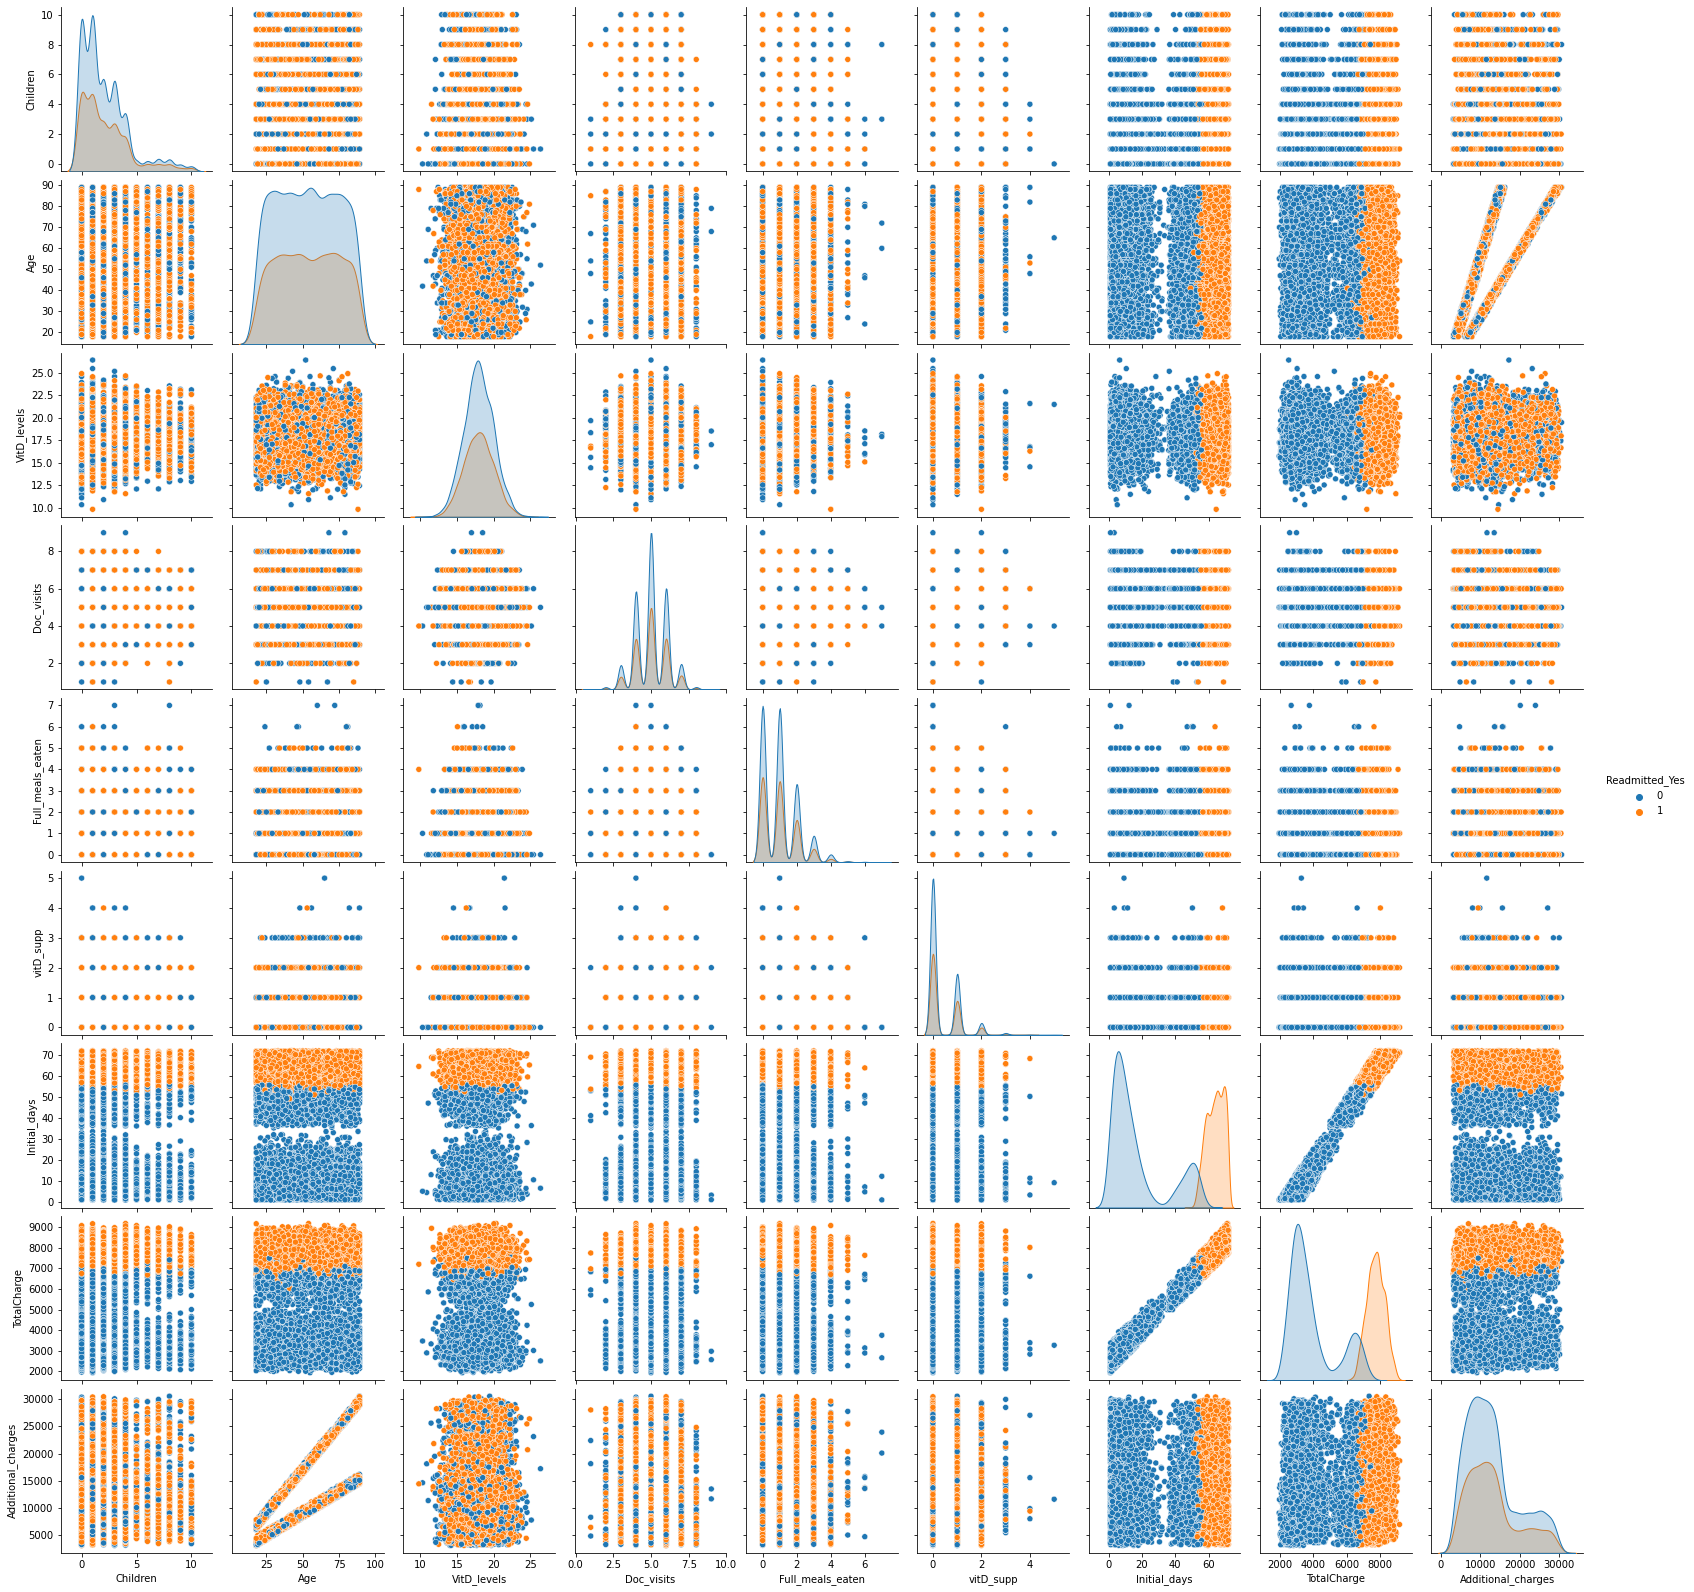

In [417]:
g = sns.pairplot(avals, hue = 'Readmitted_Yes')

In [418]:
print(df.info)

<bound method DataFrame.info of      State      Area  Children  Age    Marital  Gender  VitD_levels  \
0       AL  Suburban         1   53   Divorced    Male    19.141466   
1       FL     Urban         3   51    Married  Female    18.940352   
2       SD  Suburban         3   53    Widowed  Female    18.057507   
3       MN  Suburban         0   78    Married    Male    16.576858   
4       VA     Rural         1   22    Widowed  Female    17.439069   
...    ...       ...       ...  ...        ...     ...          ...   
9995    NC     Urban         2   25    Widowed    Male    16.980860   
9996    NJ     Urban         4   87    Widowed    Male    18.177020   
9997    TN     Rural         3   45  Separated  Female    17.129070   
9998    SD     Rural         3   43   Divorced    Male    19.910430   
9999    PA     Urban         8   70  Separated  Female    18.388620   

      Doc_visits  Full_meals_eaten  vitD_supp  ... BackPain Anxiety  \
0              6                 0          

In [193]:
df.dtypes

State             object
Area              object
TimeZone          object
Children           int64
Age                int64
                   ...  
Item5              int64
Item6              int64
Item7              int64
Item8              int64
Readmitted_Yes     uint8
Length: 76, dtype: object

In [194]:
df.astype({'Readmitted_Yes': 'int64'}).dtypes

State             object
Area              object
TimeZone          object
Children           int64
Age                int64
                   ...  
Item5              int64
Item6              int64
Item7              int64
Item8              int64
Readmitted_Yes     int64
Length: 76, dtype: object

In [419]:
df.columns

Index(['State', 'Area', 'Children', 'Age', 'Marital', 'Gender', 'VitD_levels',
       'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink',
       'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services', 'Initial_days', 'TotalCharge', 'Additional_charges',
       'Readmitted_Yes'],
      dtype='object')

In [420]:
features = ['Area','Marital', 'Gender', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services']

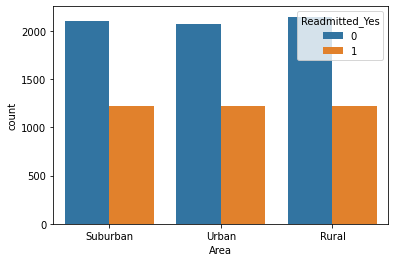

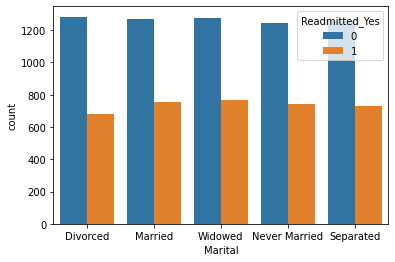

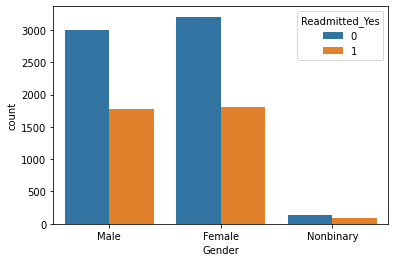

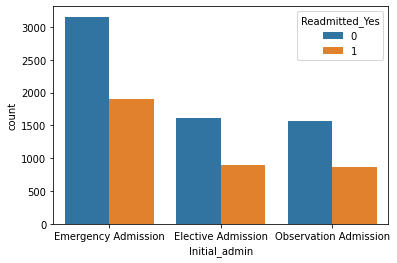

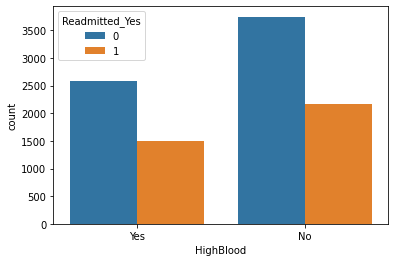

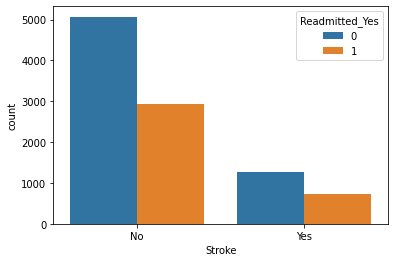

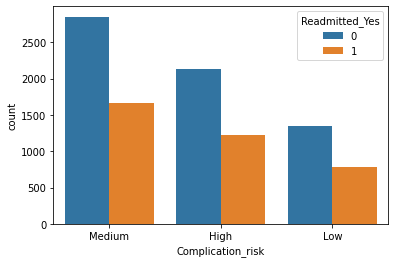

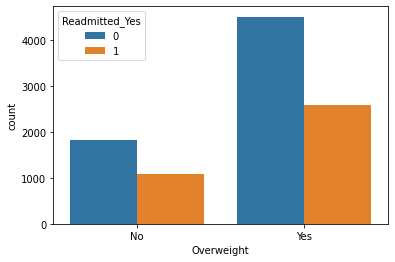

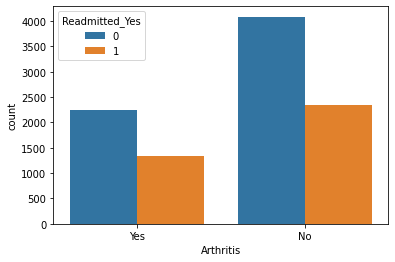

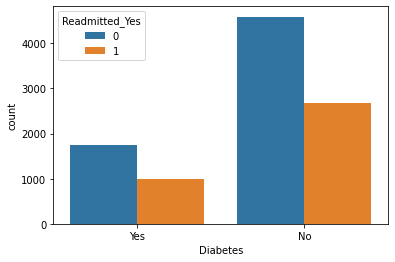

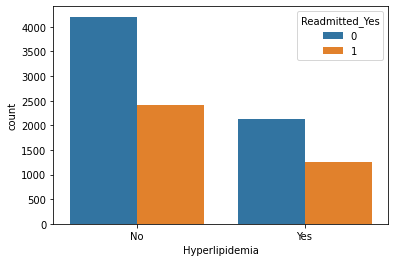

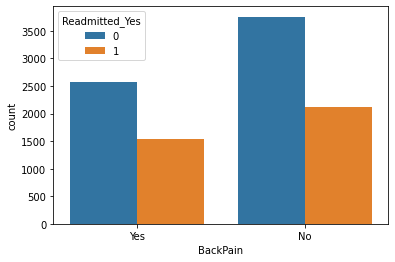

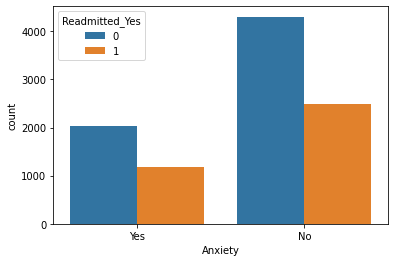

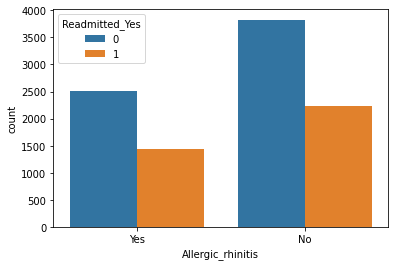

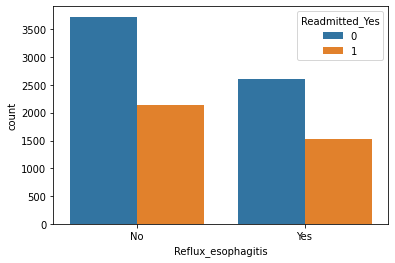

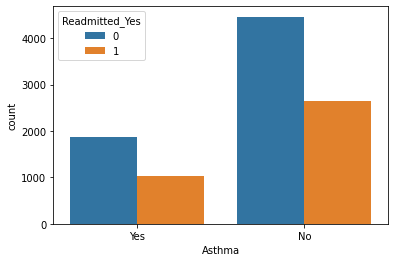

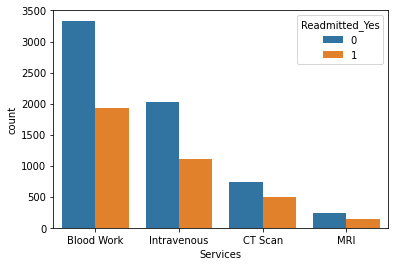

In [421]:
for f in features:
    plt.figure()
    ax = sns.countplot(x=f, data = df, hue = 'Readmitted_Yes')

In [424]:
correlation_matrix = df.corr()

In [425]:
correlation_matrix["Readmitted_Yes"]

Children              0.023532
Age                   0.015810
VitD_levels           0.004083
Doc_visits            0.000246
Full_meals_eaten     -0.012172
vitD_supp             0.011039
Initial_days          0.850862
TotalCharge           0.843726
Additional_charges    0.013620
Readmitted_Yes        1.000000
Name: Readmitted_Yes, dtype: float64